In [485]:
import pandas as pd

In [486]:
weather = pd.read_csv('data/Seattle_weather_daily.csv')
hires = pd.read_csv('data/Seattle_cycles_trip.csv')
stations = pd.read_csv('data/Seattle_cycles_station.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_11472\3937338.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  hires = pd.read_csv('data/Seattle_cycles_trip.csv')


In [487]:
weather.head(5)

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
0,10/13/2014,71,62.0,54,55,51,46,87,68,46,...,29.79,29.65,10,10,4,13,4,21,0.00,Rain
1,10/14/2014,63,59.0,55,52,51,50,88,78,63,...,29.75,29.54,10,9,3,10,5,17,0.11,Rain
2,10/15/2014,62,58.0,54,53,50,46,87,77,67,...,29.71,29.51,10,9,3,18,7,25,0.45,Rain
3,10/16/2014,71,61.0,52,49,46,42,83,61,36,...,29.95,29.81,10,10,10,9,4,-,0.00,Rain
4,10/17/2014,64,60.0,57,55,51,41,87,72,46,...,29.78,29.73,10,10,6,8,3,-,0.14,Rain


In [488]:
weather.dtypes
hires.dtypes
stations.dtypes

station_id            object
name                  object
lat                  float64
long                 float64
install_date          object
install_dockcount      int64
modification_date     object
current_dockcount      int64
decommission_date     object
dtype: object

In [489]:
weather.columns = weather.columns.str.lower()
hires.columns = hires.columns.str.lower()
stations.columns = stations.columns.str.lower()

In [490]:
weather.columns

Index(['date', 'max_temperature_f', 'mean_temperature_f', 'min_temperaturef',
       'max_dew_point_f', 'meandew_point_f', 'min_dewpoint_f', 'max_humidity',
       'mean_humidity', 'min_humidity', 'max_sea_level_pressure_in',
       'mean_sea_level_pressure_in', 'min_sea_level_pressure_in',
       'max_visibility_miles', 'mean_visibility_miles', 'min_visibility_miles',
       'max_wind_speed_mph', 'mean_wind_speed_mph', 'max_gust_speed_mph',
       'precipitation_in', 'events'],
      dtype='object')

In [491]:
# Detect and manage duplicates in 'weather'
weather_duplicates = weather.duplicated()
weather = weather[~weather_duplicates].reset_index(drop=True)

In [492]:
weather_columns_to_keep = [
    'date', 'max_temperature_f', 'mean_temperature_f', 
    'min_temperaturef', 'max_wind_speed_mph', 
    'mean_wind_speed_mph', 'max_gust_speed_mph', 
    'precipitation_in', 'events']

# Create a new DataFrame with the specified columns
filtered_weather = weather[weather_columns_to_keep].copy()

# Display the new DataFrame
filtered_weather.head(3)


,date,max_temperature_f,mean_temperature_f,min_temperaturef,max_wind_speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_in,events
0,10/13/2014,71,62.0,54,13,4,21,0.00,Rain
1,10/14/2014,63,59.0,55,10,5,17,0.11,Rain
2,10/15/2014,62,58.0,54,18,7,25,0.45,Rain


In [493]:
# change date objects to datetimes
filtered_weather['date'] = pd.to_datetime(weather['date'].str.strip(), format='%m/%d/%Y')
filtered_weather.head(2)

,date,max_temperature_f,mean_temperature_f,min_temperaturef,max_wind_speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_in,events
0,2014-10-13,71,62.0,54,13,4,21,0.00,Rain
1,2014-10-14,63,59.0,55,10,5,17,0.11,Rain


In [494]:
stations.head(3)

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN


In [495]:
# stations.decommission_date.unique to check which stations were decommisioned as we don't need them

filtered_stations = stations[pd.isna(stations['decommission_date'])].copy()

# checked if decommisioned stations removed as no date present using
# filtered_stations.decommission_date.unique

In [496]:
stations_columns_to_keep = [
    'station_id', 'name', 'lat', 'long', 'install_date',
    'current_dockcount'
    ]

# Create a new DataFrame with the specified columns
filtered_stations = filtered_stations[stations_columns_to_keep].copy()

# Display the new DataFrame, should have 57 stations
filtered_stations.head(3)


,station_id,name,lat,long,install_date,current_dockcount
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16


In [497]:
# change date objects to datetimes
# filtered_stations['install_date'] = pd.to_datetime(filtered_stations['install_date'].str.strip(), format='%m/%d/%Y')
# filtered_stations.head(2)
filtered_stations['install_date'] = pd.to_datetime(filtered_stations['install_date'], format='%m/%d/%Y')
filtered_stations.head(2)

,station_id,name,lat,long,install_date,current_dockcount
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,2014-10-13,18
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,2014-10-13,16


In [498]:
hires

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971
...,...,...,...,...,...,...,...,...,...,...,...,...
286853,255241,8/31/2016 23:34,8/31/2016 23:45,SEA00201,679.532,Harvard Ave & E Pine St,2nd Ave & Spring St,CH-09,CBD-06,Short-Term Pass Holder,NaN,NaN
286854,255242,8/31/2016 23:48,09/01/2016 00:20,SEA00247,1965.418,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286855,255243,8/31/2016 23:47,09/01/2016 00:20,SEA00300,1951.173,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286856,255244,8/31/2016 23:49,09/01/2016 00:20,SEA00047,1883.299,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN


In [499]:
hires.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_name', 'to_station_name', 'from_station_id',
       'to_station_id', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [500]:
# wrote this code just to check the original dataframe for duplicates before removing
# hires.sort_values(by = 'trip_id', ascending = True).head(4)

In [501]:

# initial method of checking for duplicates in hires dataframe

# duplicates_hires = hires[hires.duplicated('trip_id', keep='first')].copy()
# duplicates_hires.sort_values(by = 'trip_id', ascending = True).head(3)

duplicates_hires = hires[hires.duplicated(['trip_id', 'tripduration'], keep='first')].copy()

# checked if they are actually duplicates by storing in dataframe and observing
# total of 50793 duplicate rows removed
duplicates_hires.sort_values(by='trip_id', ascending=True).head(4)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
50793,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
50794,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
50795,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
50796,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977


In [502]:
# Drop duplicates based on both 'trip_id' and 'tripduration'
hires = hires.drop_duplicates(['trip_id', 'tripduration'], keep='first').reset_index(drop=True)
# hires total rows is 236065

In [503]:
hires_columns_to_keep = [
    'trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
    'from_station_id','to_station_id']

# Create a new DataFrame with the specified columns
hires = hires[hires_columns_to_keep].copy()

# Display the new DataFrame, should have 57 stations
hires.head(5)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,to_station_id
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,CBD-06,PS-04
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,CBD-06,PS-04
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,CBD-06,PS-04
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,CBD-06,PS-04
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,CBD-06,PS-04


In [504]:
hires['starttime'] = pd.to_datetime(hires['starttime'])  # Convert to datetime format

# Create new columns 'start_date' and 'start_time'
hires['start_date'] = hires['starttime'].dt.date
hires['start_time'] = hires['starttime'].dt.time

# Display the DataFrame with the new columns
hires[['starttime', 'start_date', 'start_time']].head(2)

,starttime,start_date,start_time
0,2014-10-13 10:31:00,2014-10-13,10:31:00
1,2014-10-13 10:32:00,2014-10-13,10:32:00


In [505]:
hires['stoptime'] = pd.to_datetime(hires['stoptime'])  # Convert to datetime format

# Create new columns 'start_date' and 'start_time'
hires['stop_date'] = hires['stoptime'].dt.date
hires['stop_time'] = hires['stoptime'].dt.time

# Display the DataFrame with the new columns
hires[['stoptime', 'stop_date', 'stop_time']].head(2)

,stoptime,stop_date,stop_time
0,2014-10-13 10:48:00,2014-10-13,10:48:00
1,2014-10-13 10:48:00,2014-10-13,10:48:00


In [506]:
hires = hires.drop(['starttime','stoptime'], axis=1)

In [507]:
hires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236065 entries, 0 to 236064
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   trip_id          236065 non-null  int64  
 1   bikeid           236065 non-null  object 
 2   tripduration     236065 non-null  float64
 3   from_station_id  236065 non-null  object 
 4   to_station_id    236065 non-null  object 
 5   start_date       236065 non-null  object 
 6   start_time       236065 non-null  object 
 7   stop_date        236065 non-null  object 
 8   stop_time        236065 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 16.2+ MB


In [508]:
filtered_weather.head(2)

,date,max_temperature_f,mean_temperature_f,min_temperaturef,max_wind_speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_in,events
0,2014-10-13,71,62.0,54,13,4,21,0.00,Rain
1,2014-10-14,63,59.0,55,10,5,17,0.11,Rain


In [509]:
filtered_stations.head(2)

,station_id,name,lat,long,install_date,current_dockcount
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,2014-10-13,18
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,2014-10-13,16


In [510]:
hires.head(2)

,trip_id,bikeid,tripduration,from_station_id,to_station_id,start_date,start_time,stop_date,stop_time
0,431,SEA00298,985.935,CBD-06,PS-04,2014-10-13,10:31:00,2014-10-13,10:48:00
1,432,SEA00195,926.375,CBD-06,PS-04,2014-10-13,10:32:00,2014-10-13,10:48:00


In [511]:
# filtered_stations.info()
# hires.info()
# weather.info()

In [512]:


merged_hires_stations = pd.merge(hires, filtered_stations, left_on='from_station_id', right_on='station_id', how='inner')

# Display the merged DataFrame
# merged_hires_stations.head(3)

# Convert to datetime format
merged_hires_stations['start_date'] = pd.to_datetime(merged_hires_stations['start_date'])  

# Merge based on 'start_date' and 'date'
final_merged_df = pd.merge(merged_hires_stations, filtered_weather, left_on='start_date', right_on='date', how='inner')
# final_merged_df

# merged_hires_stations
# final_merged_df

In [513]:

final_merged_df['start_time'] = pd.to_datetime(final_merged_df['start_time'], format="%H:%M:%S")
final_merged_df['stop_time'] = pd.to_datetime(final_merged_df['stop_time'], format="%H:%M:%S")
final_merged_df['start_date'] = pd.to_datetime(final_merged_df['start_date'], format="%Y-%m-%d")
final_merged_df['stop_date'] = pd.to_datetime(final_merged_df['stop_date'], format="%Y-%m-%d")

final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228812 entries, 0 to 228811
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   trip_id              228812 non-null  int64         
 1   bikeid               228812 non-null  object        
 2   tripduration         228812 non-null  float64       
 3   from_station_id      228812 non-null  object        
 4   to_station_id        228812 non-null  object        
 5   start_date           228812 non-null  datetime64[ns]
 6   start_time           228812 non-null  datetime64[ns]
 7   stop_date            228812 non-null  datetime64[ns]
 8   stop_time            228812 non-null  datetime64[ns]
 9   station_id           228812 non-null  object        
 10  name                 228812 non-null  object        
 11  lat                  228812 non-null  float64       
 12  long                 228812 non-null  float64       
 13  install_date  

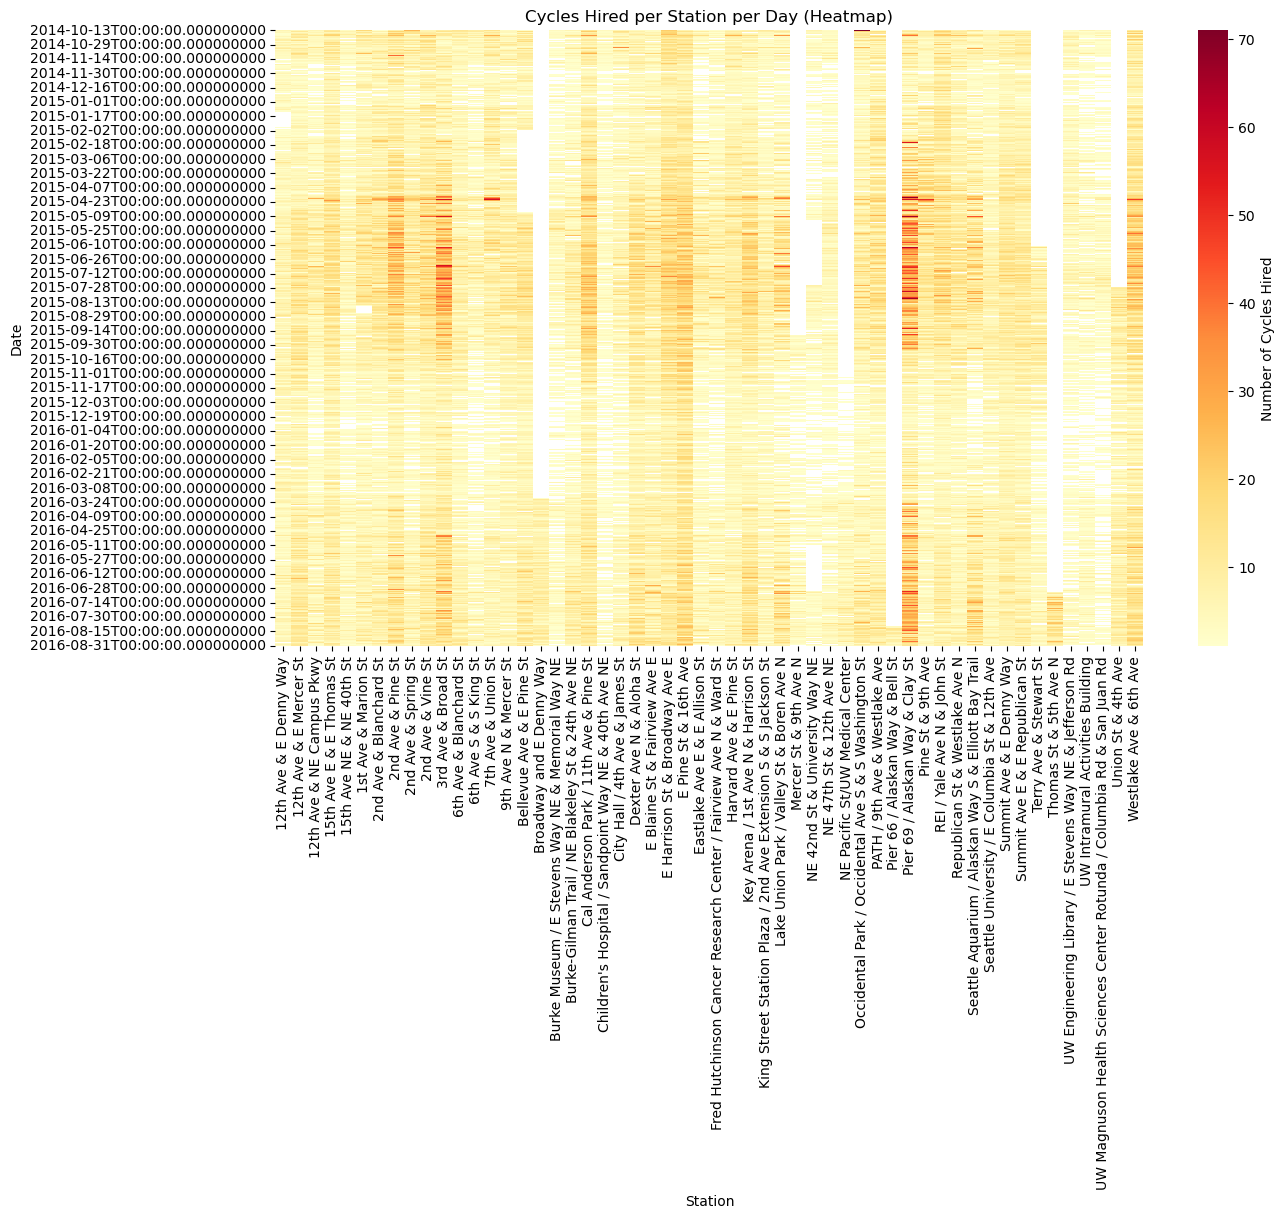

In [514]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = final_merged_df.pivot_table(values='trip_id', index='start_date', columns='name', aggfunc='count')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', cbar_kws={'label': 'Number of Cycles Hired'})
plt.title('Cycles Hired per Station per Day (Heatmap)')
plt.xlabel('Station')
plt.ylabel('Date')
plt.show()